# ```PREPROCESAMIENTO```

In [1]:
#from sklearn.cluster import KMeans
import wget
import pandas as pd

from os import path

# inicializamos un diccionario donde guardaremos el dataset
dataset = dict()
dataset['url'] = 'https://ignaciorlando.github.io/datasets/data-science/ObesityDataSet_raw_and_data_sinthetic.csv'
dataset['extension'] = '.csv'
dataset['filename'] = 'Obesity' + dataset['extension']
if not path.exists(dataset['filename']):  # descargar solamente si no existe
  wget.download(dataset['url'], dataset['filename'])
else:
  print('El archivo {} ya existe.'.format(dataset['filename']))

# accedemos a los datos usando Pandas
original_table = pd.read_table(dataset['filename'],sep=',')
original_table.head()
raw_dataset = original_table.copy()

In [4]:
raw_dataset = raw_dataset.drop(['Gender','CALC','FAVC','SCC','SMOKE','family_history_with_overweight','CAEC','MTRANS','NObeyesdad'],axis=1)

## ```ANALISIS CON PCA```

In [5]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# estandarizamos X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(raw_dataset)

print(np.std(X_scaled, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1.]


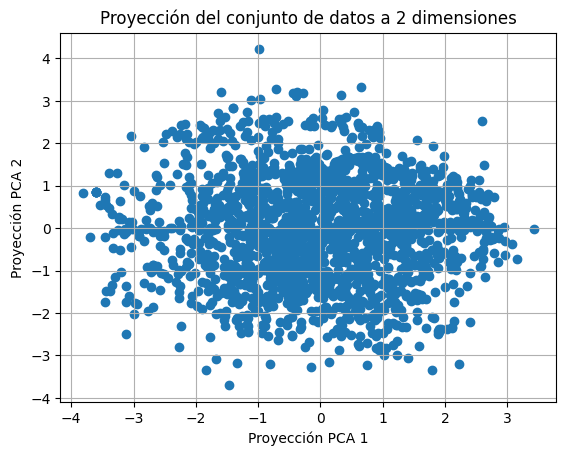

In [6]:
import matplotlib.pyplot as plt
# Ahora aplicamos PCA a los datos estandarizados
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# graficamos los datos
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.show()

In [7]:
pca.__dict__

{'n_components': 2,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'n_features_in_': 8,
 '_fit_svd_solver': 'covariance_eigh',
 'mean_': array([ 0.00000000e+00, -5.38544944e-16, -5.38544944e-16, -1.34636236e-17,
         4.96471120e-16,  1.07708989e-16,  2.69272472e-17, -1.34636236e-17]),
 'noise_variance_': np.float64(0.7829509239807618),
 'n_samples_': 2111,
 'n_components_': 2,
 'components_': array([[ 0.00759208,  0.59807749,  0.50366086,  0.16196797,  0.33312341,
          0.38465497,  0.32123642,  0.0146391 ],
        [ 0.60380242, -0.07029488,  0.36177851,  0.2601867 , -0.12777839,
         -0.0529933 , -0.36164717, -0.53101429]]),
 'explained_variance_': array([1.81274705, 1.49333888]),
 'explained_variance_ratio_': array([0.22648604, 0.18657893]),
 'singular_values_': array([61.84574582, 56.13327914])}

No explica nada. No alcanzan dos componentes para explicar todo. Con dos componentes se explica un 40% de la varianza

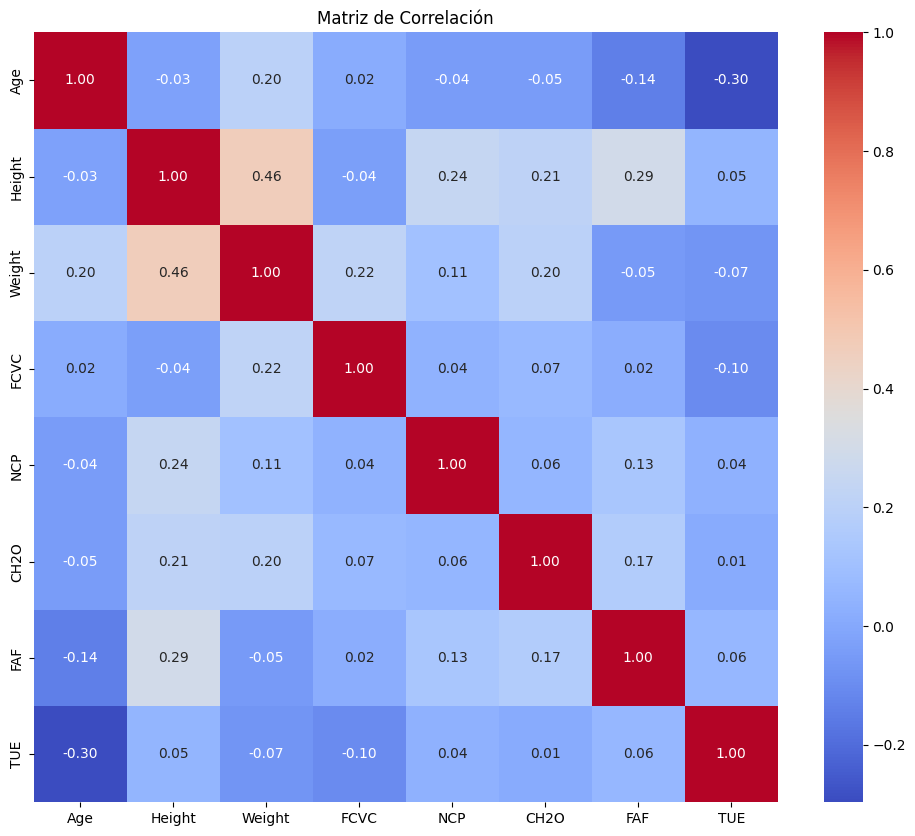

In [9]:
import seaborn as sns

correlation_matrix = raw_dataset.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [12]:
# Crear dummies para las columnas eliminadas
categorical_columns = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']

# Obtener dummies para las columnas categóricas
dummies = pd.get_dummies(original_table[categorical_columns], drop_first=True)

# Concatenar las dummies al dataset original (antes del drop)
raw_dataset = pd.concat([raw_dataset, dummies], axis=1)



In [13]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# estandarizamos X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(raw_dataset)

print(np.std(X_scaled, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


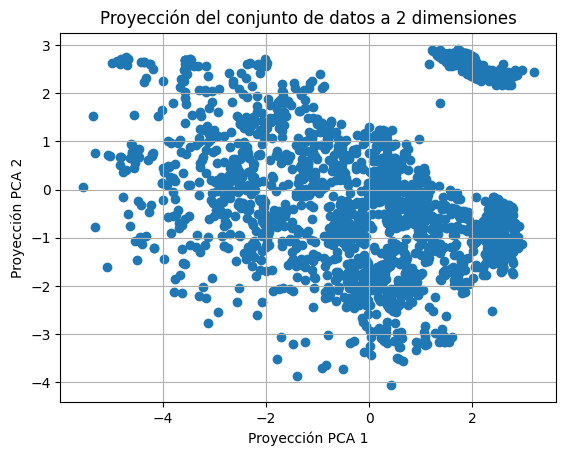

In [14]:
import matplotlib.pyplot as plt
# Ahora aplicamos PCA a los datos estandarizados
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# graficamos los datos
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.show()

In [15]:
pca.__dict__

{'n_components': 2,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'n_features_in_': 29,
 '_fit_svd_solver': 'covariance_eigh',
 'mean_': array([ 0.00000000e+00, -5.38544944e-16, -5.38544944e-16, -1.34636236e-17,
         4.96471120e-16,  1.07708989e-16,  2.69272472e-17, -1.34636236e-17,
        -5.38544944e-17, -1.34636236e-17, -3.36590590e-17,  1.07708989e-16,
         1.34636236e-16, -6.73181180e-17, -2.01954354e-17, -8.07817416e-17,
         0.00000000e+00,  8.07817416e-17,  5.38544944e-17, -1.00977177e-17,
         2.01954354e-17,  6.73181180e-17,  0.00000000e+00,  2.69272472e-17,
         2.69272472e-17, -5.38544944e-17, -1.07708989e-16, -2.69272472e-17,
        -6.73181180e-18]),
 'noise_variance_': np.float64(0.8404293433387257),
 'n_samples_': 2111,
 'n_components_': 2,
 'components_': array([[ 0.14668254,  0.24417283,  0.44437055,  0.07844547, 

Empeoro

In [16]:
raw_dataset = raw_dataset.drop(dummies,axis=1)

In [19]:
# estandarizamos X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(raw_dataset)

print(np.std(X_scaled, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1.]


In [26]:
from sklearn.preprocessing import LabelEncoder

# Inicializar el codificador
label_encoder = LabelEncoder()

# Identificar las columnas categóricas
categorical_columns = original_table.select_dtypes(include=['object']).columns

# Aplicar Label Encoding a cada columna categórica
for col in categorical_columns:
    original_table[col] = label_encoder.fit_transform(original_table[col])

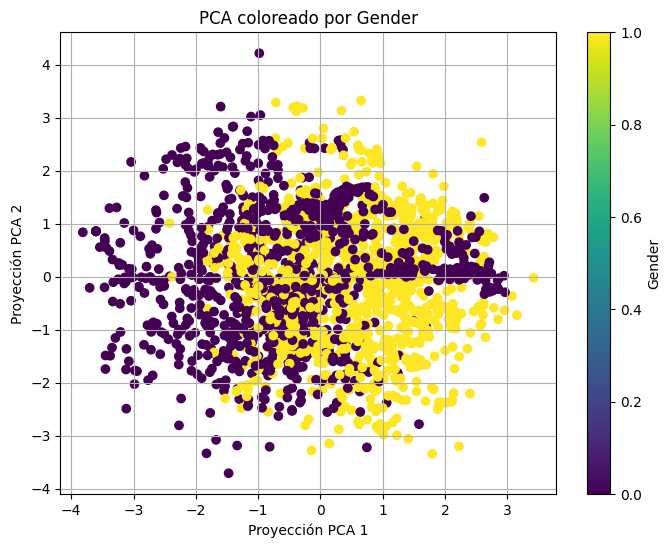

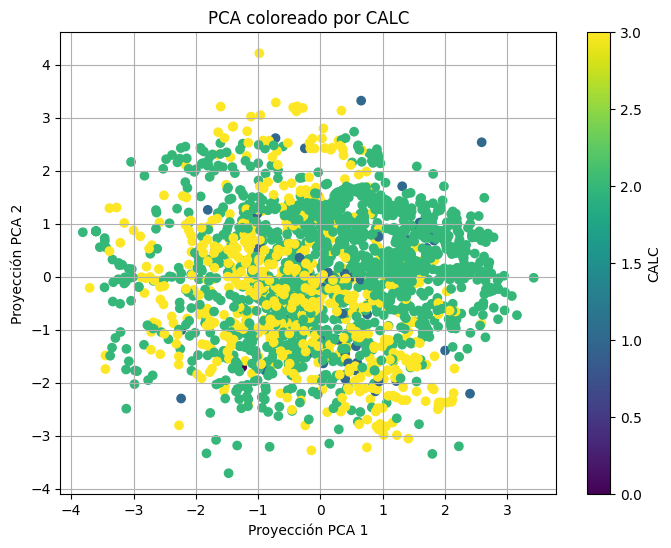

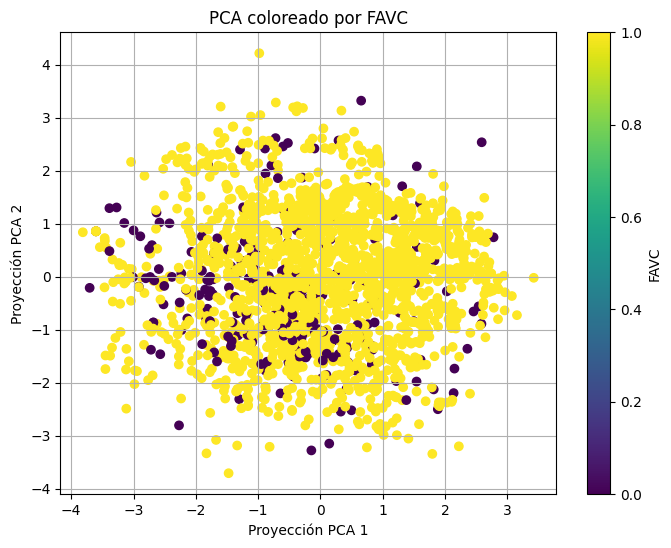

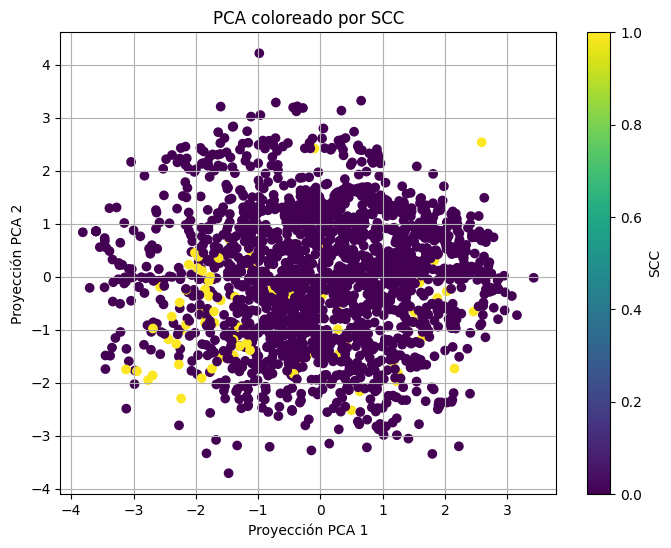

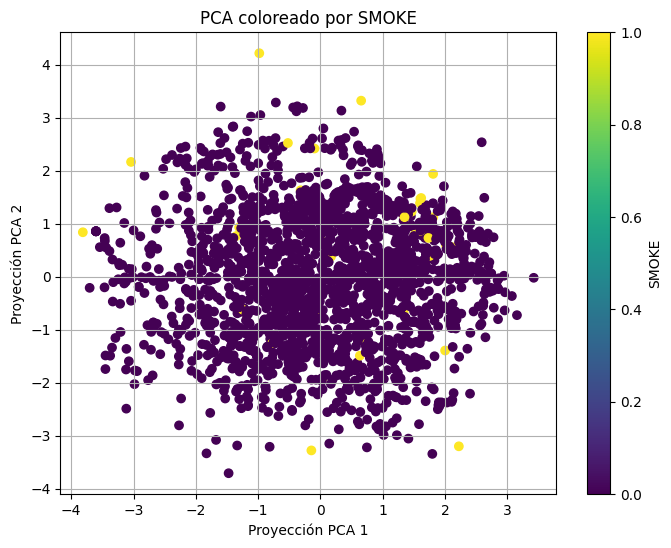

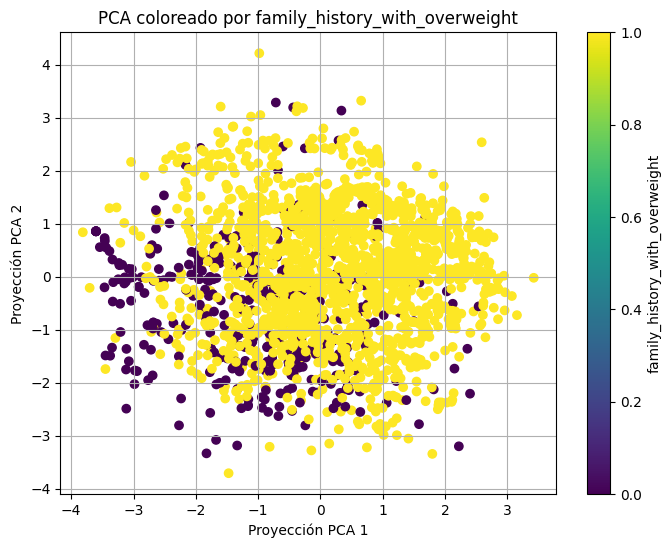

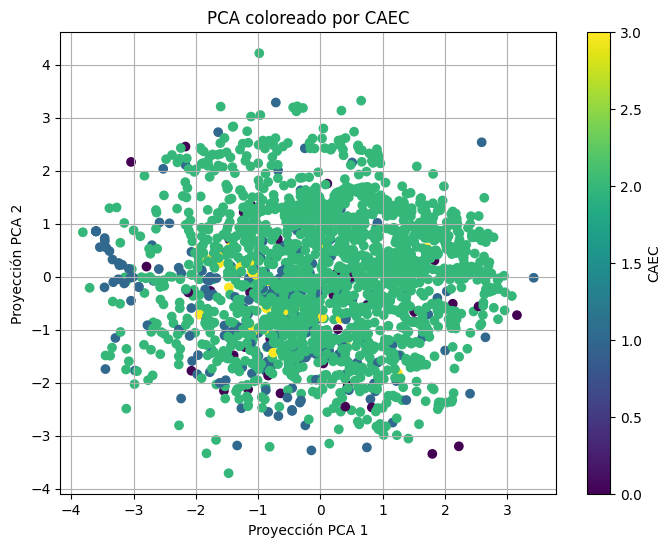

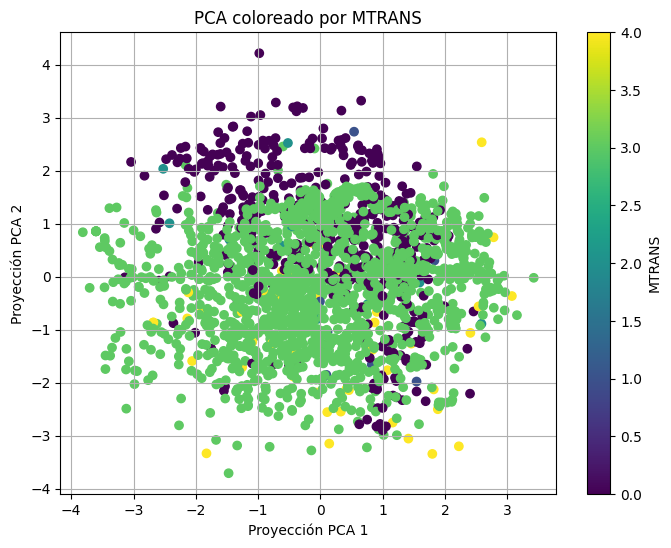

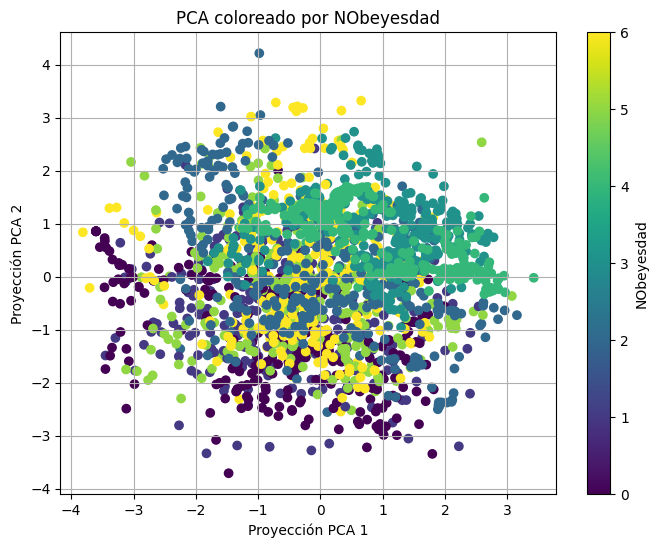

In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
categorical_columns = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=original_table[col], cmap='viridis')
    plt.grid(True)
    plt.xlabel('Proyección PCA 1')
    plt.ylabel('Proyección PCA 2')
    plt.title(f'PCA coloreado por {col}')
    plt.colorbar(label=col)
    plt.show()

## ```ANALISIS CON t-SNE```

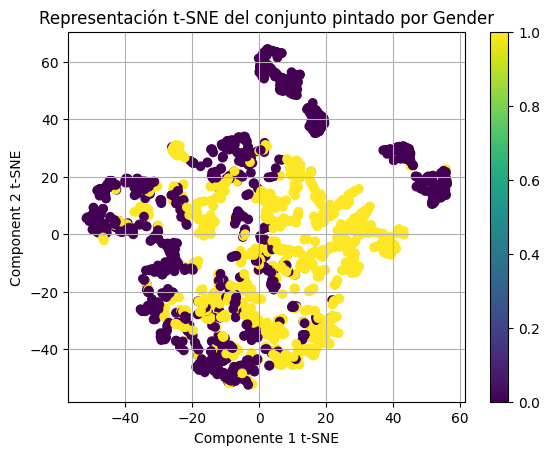

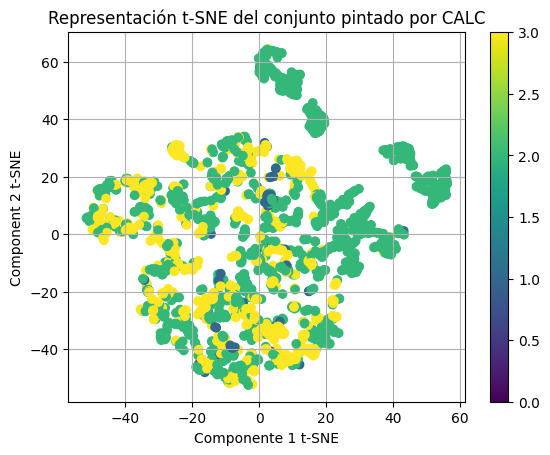

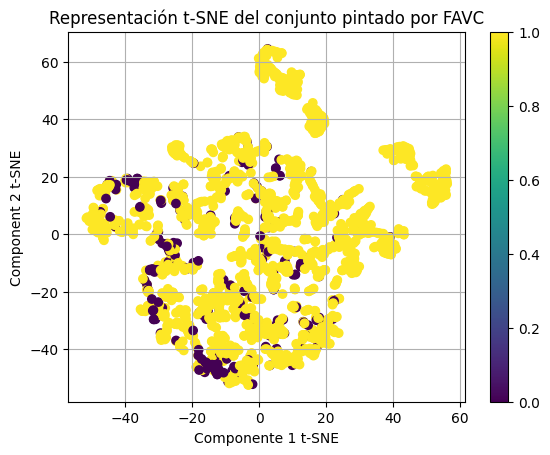

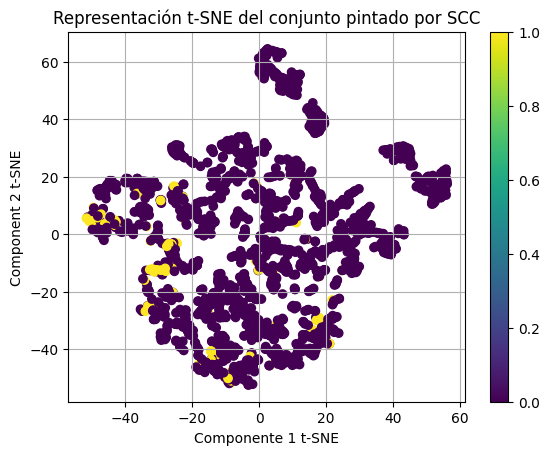

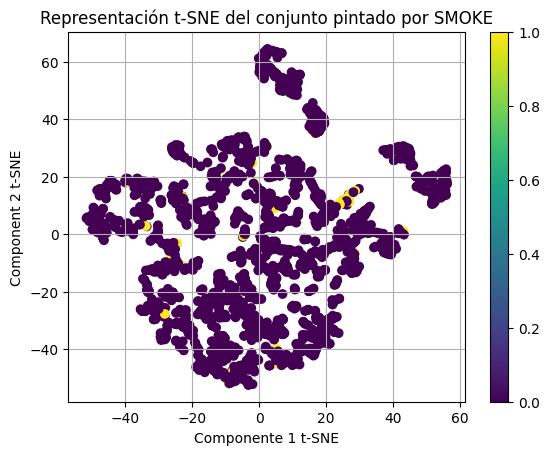

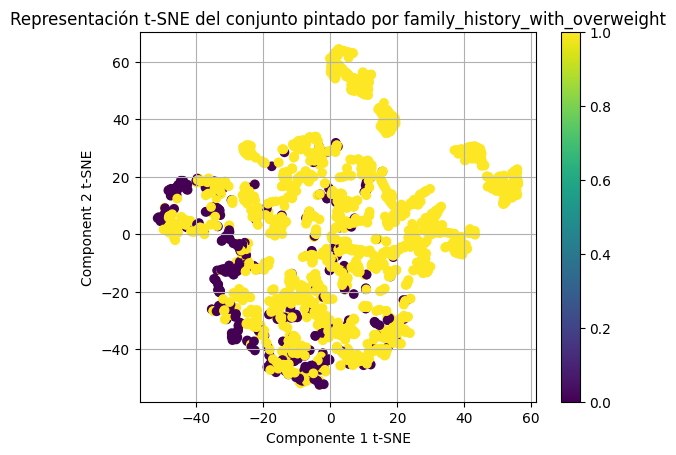

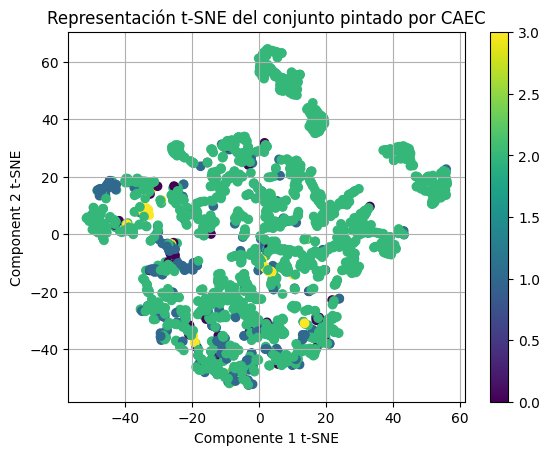

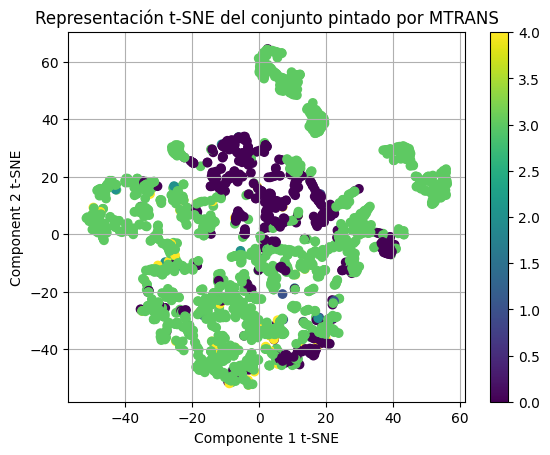

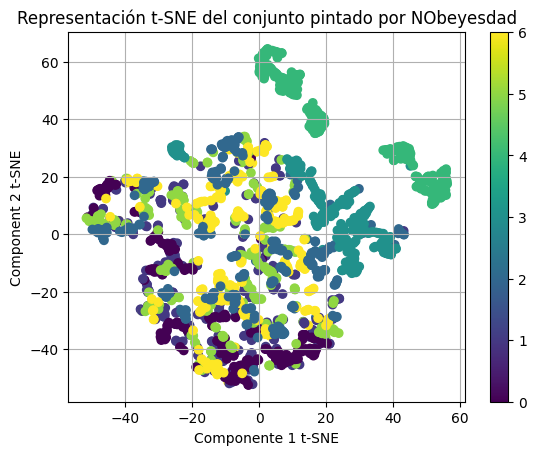

In [43]:
# importamos el t-SNE
from sklearn.manifold import TSNE

# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos
#X_tsne = TSNE(n_components=2).fit_transform(X_train_stand) # sin random state
X_tsne = TSNE(n_components=2, random_state=10).fit_transform(X_scaled)  # con random state

for col in categorical_columns:
    # graficamos los datos, el color de cada punto representa el valor de la casa
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c=original_table[col], cmap='viridis')
    plt.grid(True)
    plt.xlabel('Componente 1 t-SNE')
    plt.ylabel('Component 2 t-SNE')
    plt.title(f'Representación t-SNE del conjunto pintado por {col}')
    plt.colorbar()
    plt.show()

## ```ANALISIS CON UMAP```

No me daja usar u map por la version de python

## ```ANALISIS DE CANTIDAD DE COMPONENTES PRINCIPALES```

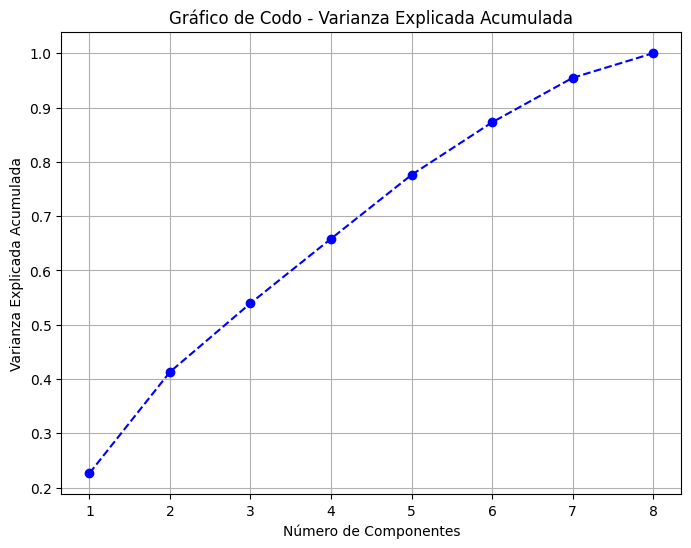

In [46]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Aplicamos PCA sin reducir componentes (todos los componentes)
pca = PCA()
pca.fit(X_scaled)

# Obtenemos la varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Calculamos la varianza acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)

# Graficamos el gráfico de codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Gráfico de Codo - Varianza Explicada Acumulada')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

7 COMPONENTES SON NECESARIOS PARA EXPLICAR EL 95% DE LA VARIANZA